In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/project/mobility/draft

/content/drive/MyDrive/project/mobility/draft


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from scipy.fft import fft, fftfreq
import os

plt.style.use('seaborn-v0_8-whitegrid')
USER_NAME = input()
DATA_PATH = os.path.join("results", f"IMFs_{USER_NAME.lower()}.csv")

kdy


In [ ]:
df = pd.read_csv(DATA_PATH)
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col], errors="ignore")

# 인덱스 번호를 시간 축처럼 사용
df.index.name = "sample_index"
print(f"행 개수 (시점): {len(df):,}")
print(f"열 개수 (IMF 성분 수): {df.shape[1]}")
print("\n컬럼별 요약 통계:\n", df.describe().T)

FileNotFoundError: [Errno 2] No such file or directory: 'results/IMFs_ydb.csv'

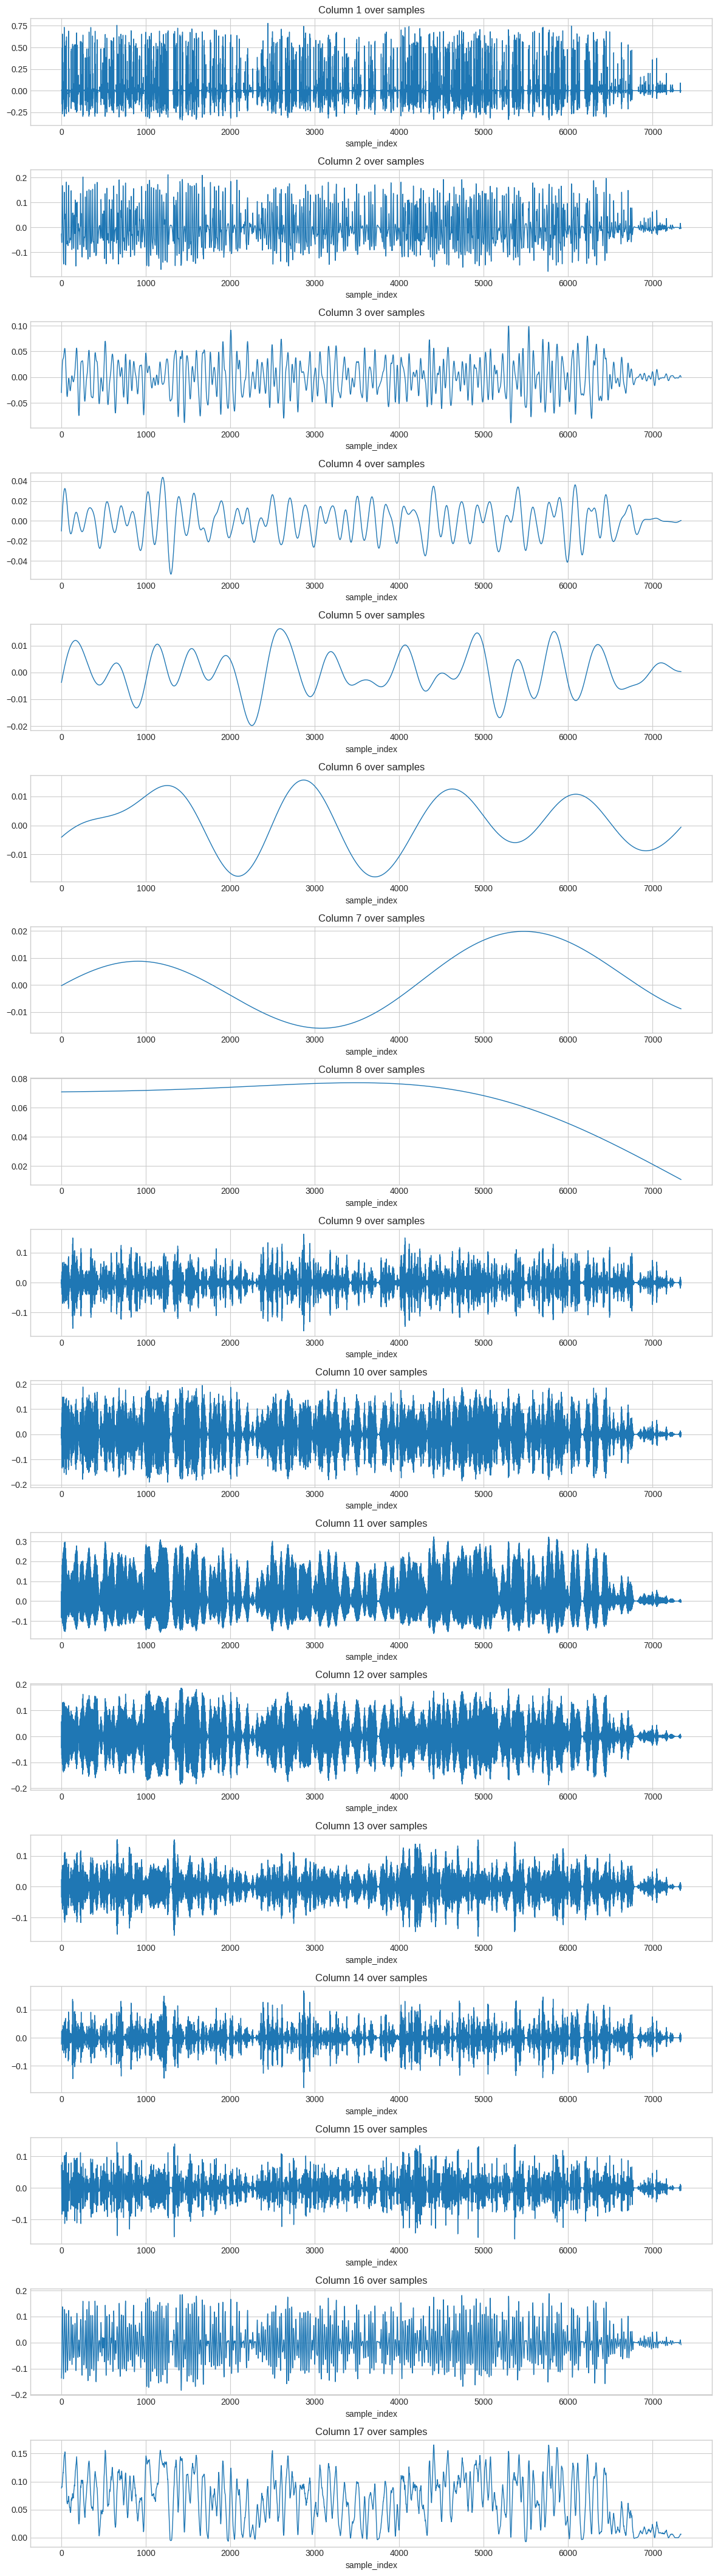

In [ ]:
fig, axes = plt.subplots(len(df.columns), 1, figsize=(12, 2.5*len(df.columns)))
for i, col in enumerate(df.columns):
    df[col].plot(ax=axes[i], lw=1)
    axes[i].set_title(f"{col} over samples")
plt.tight_layout()
plt.show()

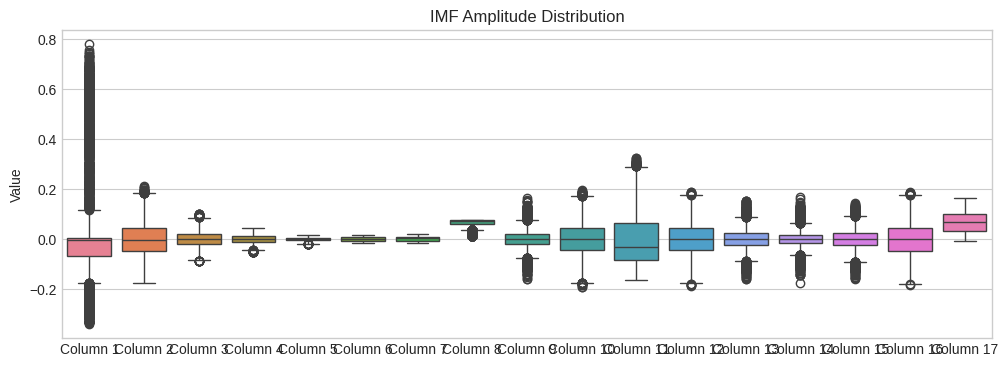

In [ ]:
# IMF 분포 Boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df)
plt.title("IMF Amplitude Distribution")
plt.ylabel("Value")
plt.show()

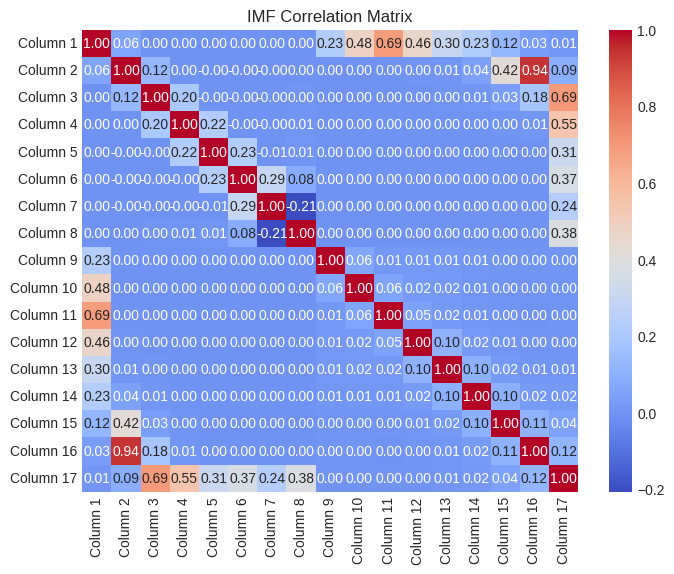

In [ ]:
# IMF 간 상관관계
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("IMF Correlation Matrix")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


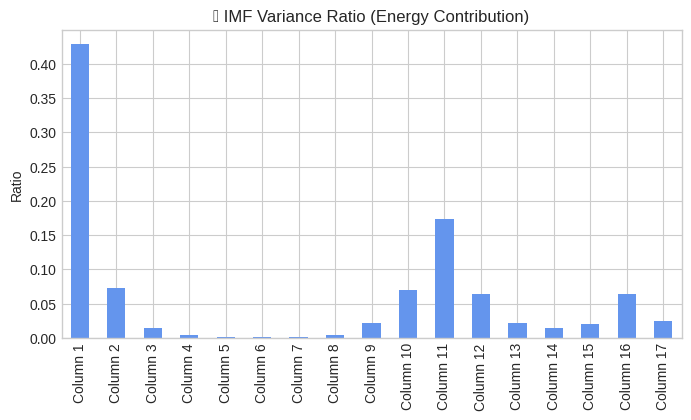


IMF별 에너지 비율:
 Column 1     0.428259
Column 2     0.072765
Column 3     0.013898
Column 4     0.003447
Column 5     0.000776
Column 6     0.001205
Column 7     0.001656
Column 8     0.004252
Column 9     0.021018
Column 10    0.069098
Column 11    0.173892
Column 12    0.064136
Column 13    0.021167
Column 14    0.014378
Column 15    0.020680
Column 16    0.064593
Column 17    0.024780
dtype: float64


In [ ]:
# IMF별 분산 기여도
var_ratio = df.var() / df.var().sum()
plt.figure(figsize=(8, 4))
var_ratio.plot(kind="bar", color="cornflowerblue")
plt.title("⚡ IMF Variance Ratio (Energy Contribution)")
plt.ylabel("Ratio")
plt.show()
print("\nIMF별 에너지 비율:\n", var_ratio)

In [ ]:
# ADF Test
print("\n ADF 정상성 검정 결과:")
for col in df.columns:
    try:
        pvalue = adfuller(df[col].dropna())[1]
        print(f"{col}: p-value={pvalue:.4f} → {'Stationary' if pvalue < 0.05 else 'Non-Stationary'}")
    except Exception:
        print(f"{col}: 정상성 검정 실패 (데이터 부족 또는 상수열)")


 ADF 정상성 검정 결과:
Column 1: p-value=0.0000 → Stationary
Column 2: p-value=0.0000 → Stationary
Column 3: p-value=0.0000 → Stationary
Column 4: p-value=0.0000 → Stationary
Column 5: p-value=0.0669 → Non-Stationary
Column 6: p-value=0.5140 → Non-Stationary
Column 7: p-value=0.1597 → Non-Stationary
Column 8: p-value=0.0000 → Stationary
Column 9: p-value=0.0000 → Stationary
Column 10: p-value=0.0000 → Stationary
Column 11: p-value=0.0000 → Stationary
Column 12: p-value=0.0000 → Stationary
Column 13: p-value=0.0000 → Stationary
Column 14: p-value=0.0000 → Stationary
Column 15: p-value=0.0000 → Stationary
Column 16: p-value=0.0000 → Stationary
Column 17: p-value=0.0000 → Stationary


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


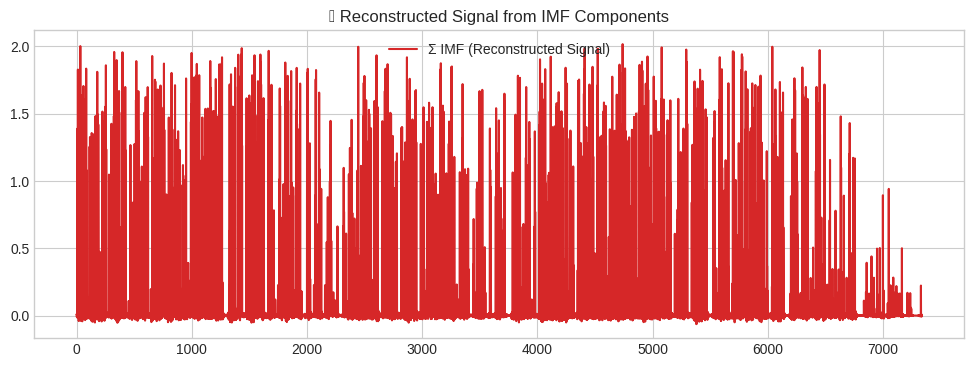

In [ ]:
# IMF 합성 검증
df["reconstructed"] = df.sum(axis=1)
plt.figure(figsize=(12, 4))
plt.plot(df.index, df["reconstructed"], label="Σ IMF (Reconstructed Signal)", color="tab:red")
plt.title("🔄 Reconstructed Signal from IMF Components")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


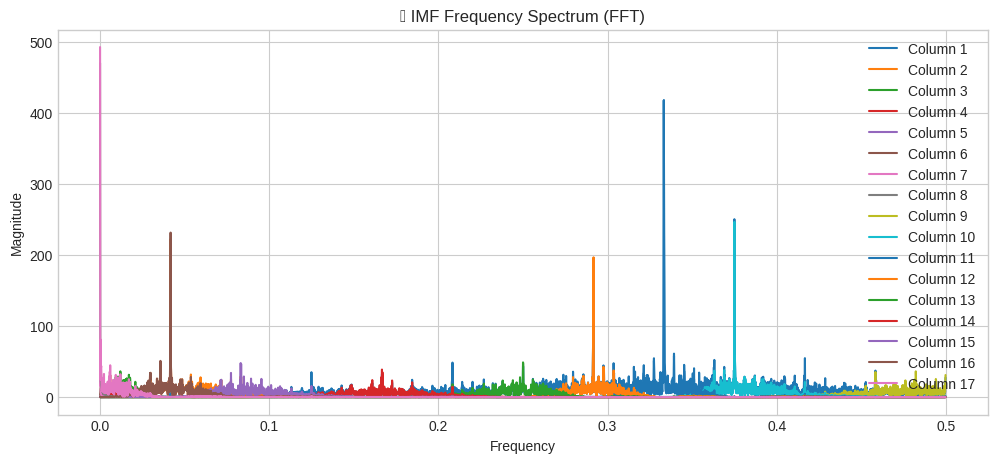

In [ ]:
# IMF별 주파수 분석
plt.figure(figsize=(12, 5))
for col in df.columns[:-1]:  # reconstructed 제외
    y = df[col].values
    mag = np.abs(fft(y))
    freq = fftfreq(len(y))
    plt.plot(freq[:len(freq)//2], mag[:len(mag)//2], label=col)
plt.title("IMF Frequency Spectrum (FFT)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

In [ ]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np

# IMF별 주파수 분석 (마지막 9개 제외)
plt.figure(figsize=(12, 5))

imf_columns = df.columns[:-9]   # 마지막 9개 제외한 IMF들만 선택

for col in imf_columns:
    y = df[col].values
    mag = np.abs(fft(y))
    freq = fftfreq(len(y))

    # 양의 주파수 영역만 플롯
    half = len(freq) // 2
    plt.plot(freq[:half], mag[:half], label=col)

plt.title("IMF Frequency Spectrum (FFT)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

<Figure size 1200x500 with 0 Axes>

In [ ]:
USER_NAME = input()
DATA_PATH = os.path.join("results", f"IMFs_{USER_NAME.lower()}.csv")

from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np

# IMF별 주파수 분석 (마지막 9개 제외)
plt.figure(figsize=(12, 5))

imf_columns = df.columns[:-9]   # 마지막 9개 제외한 IMF들만 선택

for col in imf_columns:
    y = df[col].values
    mag = np.abs(fft(y))
    freq = fftfreq(len(y))

    # 양의 주파수 영역만 플롯
    half = len(freq) // 2
    plt.plot(freq[:half], mag[:half], label=col)

plt.title("IMF Frequency Spectrum (FFT)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.legend()
plt.tight_layout()
plt.show()


ydb


NameError: name 'os' is not defined

kdy


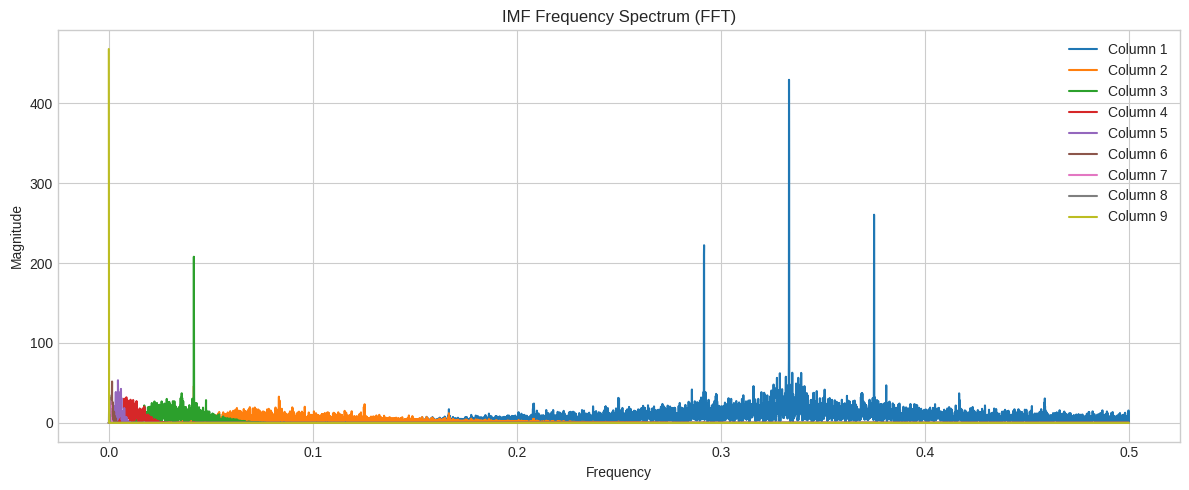

In [4]:
USER_NAME = input()
DATA_PATH = os.path.join("data", f"IMFs_{USER_NAME.lower()}.csv")

from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv(DATA_PATH)
# IMF별 주파수 분석 (마지막 9개 제외)
plt.figure(figsize=(12, 5))

imf_columns = df.columns[:-9]   # 마지막 9개 제외한 IMF들만 선택

for col in imf_columns:
    y = df[col].values
    mag = np.abs(fft(y))
    freq = fftfreq(len(y))

    # 양의 주파수 영역만 플롯
    half = len(freq) // 2
    plt.plot(freq[:half], mag[:half], label=col)

plt.title("IMF Frequency Spectrum (FFT)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.legend()
plt.tight_layout()
plt.show()
